# Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# computer vision library
import cv2

# glob
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# extract path of male and female in crop_data folder and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [6]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)


In [7]:
df.head()    

,filepath,gender
0,./crop_data/female/female_3399.jpg,female
1,./crop_data/female/female_3590.jpg,female
2,./crop_data/female/female_2375.jpg,female
3,./crop_data/female/female_4341.jpg,female
4,./crop_data/female/female_2529.jpg,female


In [8]:
df.tail()

,filepath,gender
2170,./crop_data/male/male_1084.jpg,male
2171,./crop_data/male/male_4349.jpg,male
2172,./crop_data/male/male_861.jpg,male
2173,./crop_data/male/male_5128.jpg,male
2174,./crop_data/male/male_3488.jpg,male


In [9]:
df.shape

(4761, 2)

In [10]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [11]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [12]:
df.head()

,filepath,gender,dimension
0,./crop_data/female/female_3399.jpg,female,182
1,./crop_data/female/female_3590.jpg,female,182
2,./crop_data/female/female_2375.jpg,female,122
3,./crop_data/female/female_4341.jpg,female,182
4,./crop_data/female/female_2529.jpg,female,122


#### Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [13]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

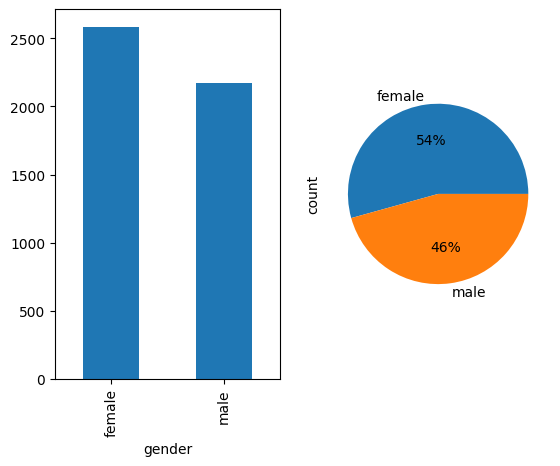

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

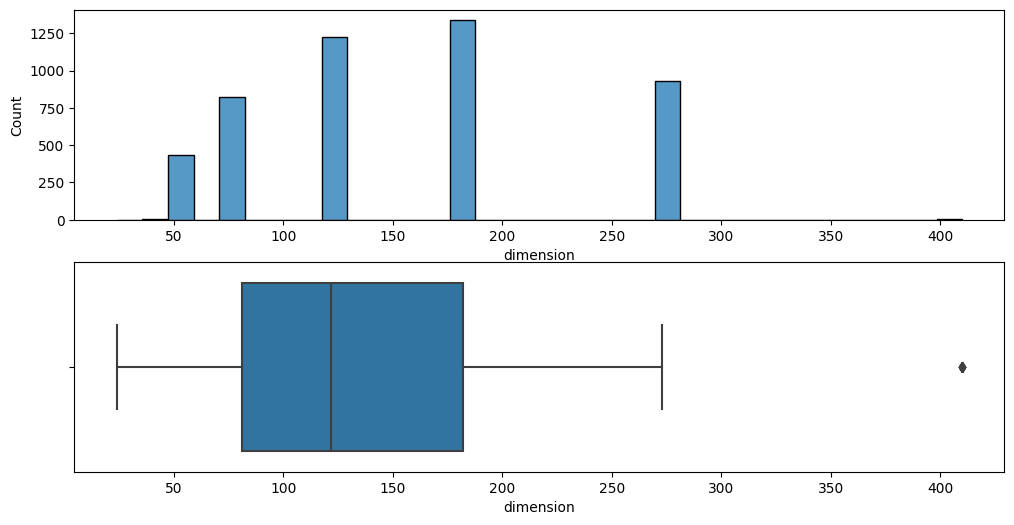

In [26]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Gender”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(data = df, x='dimension')
plt.show()

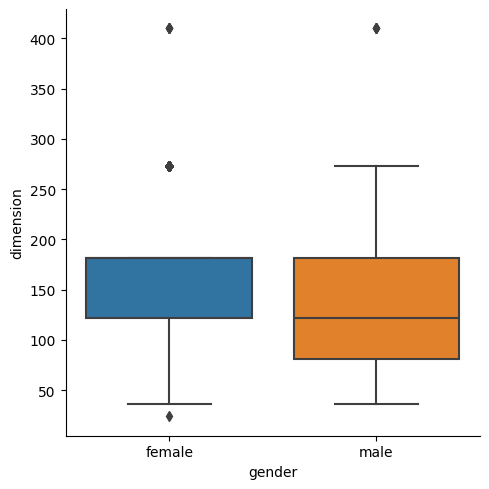

In [18]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

1. We have almost equal distrbution of gender (numbers)
2. Most of the images are having dimension more than 60
3. Female most of the female images are HD compare to male images

---
- **Consider the image with dimensions more than 60**
- **Resize all the the image into 100 x 100**

In [27]:
df_filter = df.query('dimension > 60')
df_filter.shape

(4323, 3)

In [28]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552163
male      0.447837
Name: proportion, dtype: float64

#### Structure the image 
- 100 x 100

In [29]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4: Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [30]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female/female_3399.jpg,female,182,"[107, 122, 157, 147, 98, 102, 89, 104, 115, 13..."
1,./crop_data/female/female_3590.jpg,female,182,"[18, 22, 9, 13, 13, 7, 6, 7, 10, 10, 9, 11, 10..."
2,./crop_data/female/female_2375.jpg,female,122,"[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5..."
3,./crop_data/female/female_4341.jpg,female,182,"[39, 44, 36, 32, 45, 32, 50, 20, 34, 31, 33, 3..."
4,./crop_data/female/female_2529.jpg,female,122,"[108, 97, 75, 72, 71, 82, 93, 89, 82, 77, 86, ..."


In [31]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,107,122,157,147,98,102,89,104,115,138,...,101,87,139,90,119,160,190,192,187,193
1,18,22,9,13,13,7,6,7,10,10,...,65,60,56,51,46,46,46,45,40,36
2,50,50,50,50,50,50,50,50,50,50,...,134,134,136,134,131,130,127,126,138,158
3,39,44,36,32,45,32,50,20,34,31,...,22,19,18,14,24,18,28,22,39,35
4,108,97,75,72,71,82,93,89,82,77,...,232,231,232,202,213,238,243,241,182,114


#### Data Normalization

In [32]:
# since for 8 bit image max value is 255 
# therefore we are dividing each and every pixel with 255
data = data/255.0 
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.419608,0.478431,0.615686,0.576471,0.384314,0.400000,0.349020,0.407843,0.450980,0.541176,...,0.341176,0.545098,0.352941,0.466667,0.627451,0.745098,0.752941,0.733333,0.756863,female
1,0.070588,0.086275,0.035294,0.050980,0.050980,0.027451,0.023529,0.027451,0.039216,0.039216,...,0.235294,0.219608,0.200000,0.180392,0.180392,0.180392,0.176471,0.156863,0.141176,female
2,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,...,0.525490,0.533333,0.525490,0.513725,0.509804,0.498039,0.494118,0.541176,0.619608,female
3,0.152941,0.172549,0.141176,0.125490,0.176471,0.125490,0.196078,0.078431,0.133333,0.121569,...,0.074510,0.070588,0.054902,0.094118,0.070588,0.109804,0.086275,0.152941,0.137255,female
4,0.423529,0.380392,0.294118,0.282353,0.278431,0.321569,0.364706,0.349020,0.321569,0.301961,...,0.905882,0.909804,0.792157,0.835294,0.933333,0.952941,0.945098,0.713725,0.447059,female


In [33]:
###
data.isnull().sum().sum()

0

In [34]:
## remove the missing values
data.dropna(inplace=True)

In [35]:
data.shape

(4323, 10001)

In [36]:
import pickle
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))